In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import *
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Slowest task Impact

In [2]:
SparkComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak.csv').drop(['Framework'],axis=1)
SparkWrangler = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/wrangler_spark_NoIOweak.csv').drop(['Framework'],axis=1)
MPI4pyComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweakUpTo32.csv').drop(['Framework'],axis=1)
MPI4pyWrangler = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/wrangler_mpi4py_NoIOweakUpTo32.csv').drop(['Framework'],axis=1)

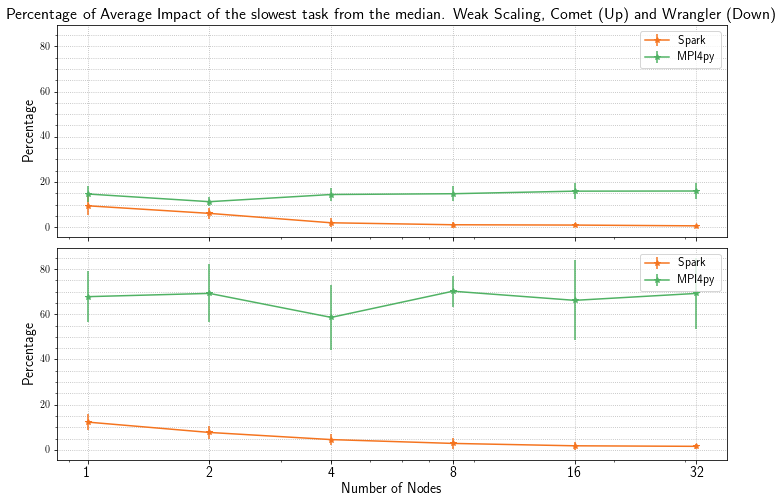

In [3]:
impactCSpark = slowest_impact(SparkComet,nodes=[1,2,4,8,16,32],center='median')
impactWSpark = slowest_impact(SparkWrangler,nodes=[1,2,4,8,16,32],center='median')
impactCMPI4py = slowest_impact(MPI4pyComet,nodes=[1,2,4,8,16,32],center='median')
impactWMPI4py = slowest_impact(MPI4pyWrangler,nodes=[1,2,4,8,16,32],center='median')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCSpark],yerr=[np.std(D)*100 for D in impactCSpark],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCMPI4py],yerr=[np.std(D)*100 for D in impactCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWSpark],yerr=[np.std(D)*100 for D in impactWSpark],color=oranges(150),marker='*',label='Spark')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWMPI4py],yerr=[np.std(D)*100 for D in impactWMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].set_ylabel('Percentage',fontsize=14)
axes[1].set_ylabel('Percentage',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Percentage of Average Impact of the slowest task from the median. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)

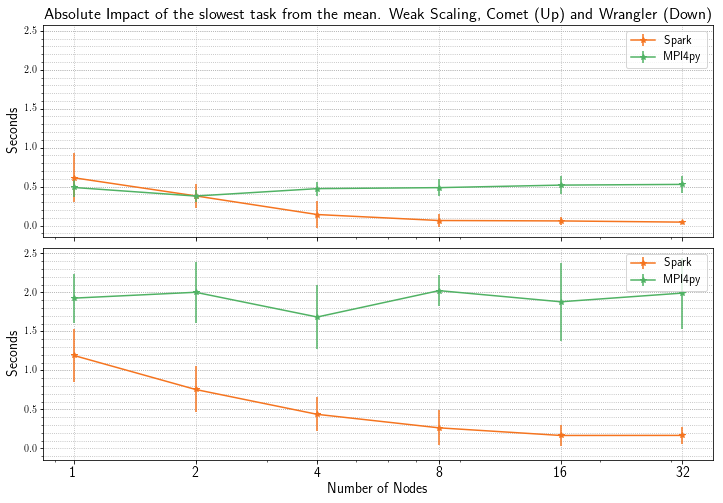

In [4]:
impactCSpark = slowest_impact(SparkComet,nodes=[1,2,4,8,16,32],center='medianabs',div=1000.0)
impactWSpark = slowest_impact(SparkWrangler,nodes=[1,2,4,8,16,32],center='medianabs',div=1000.0)
impactCMPI4py = slowest_impact(MPI4pyComet,nodes=[1,2,4,8,16,32],center='medianabs',div=1.0)
impactWMPI4py = slowest_impact(MPI4pyWrangler,nodes=[1,2,4,8,16,32],center='medianabs',div=1.0)

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCSpark],yerr=[np.std(D) for D in impactCSpark],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCMPI4py],yerr=[np.std(D) for D in impactCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWSpark],yerr=[np.std(D) for D in impactWSpark],color=oranges(150),marker='*',label='Spark')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWMPI4py],yerr=[np.std(D) for D in impactWMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Absolute Impact of the slowest task from the mean. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


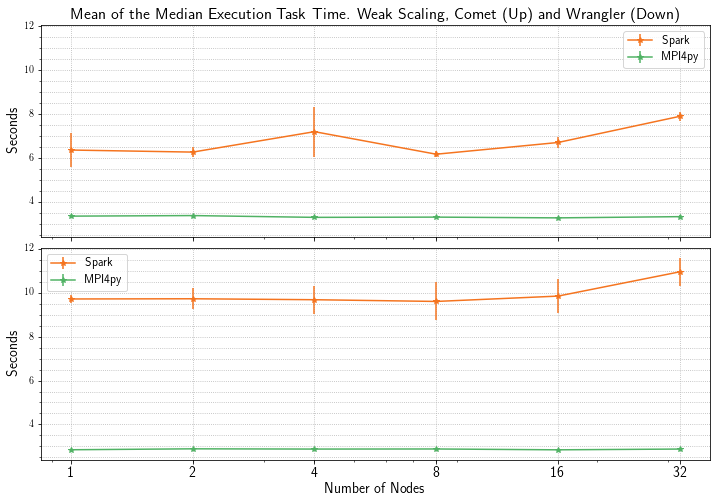

In [5]:
centersCSpark = task_centers(SparkComet,nodes=[1,2,4,8,16,32],measure='median')
centersWSpark = task_centers(SparkWrangler,nodes=[1,2,4,8,16,32],measure='median')
centersCMPI4py = task_centers(MPI4pyComet,nodes=[1,2,4,8,16,32],measure='median')
centersWMPI4py = task_centers(MPI4pyWrangler,nodes=[1,2,4,8,16,32],measure='median')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000.0 for D in centersCSpark],yerr=[np.std(D)/1000.0 for D in centersCSpark],color=oranges(150),marker='*',label='Spark')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000.0 for D in centersWSpark],yerr=[np.std(D)/1000.0 for D in centersWSpark],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1.0 for D in centersCMPI4py],yerr=[np.std(D)/1.0 for D in centersCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1.0 for D in centersWMPI4py],yerr=[np.std(D)/1.0 for D in centersWMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Mean of the Median Execution Task Time. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


## Average Coefficient of variation

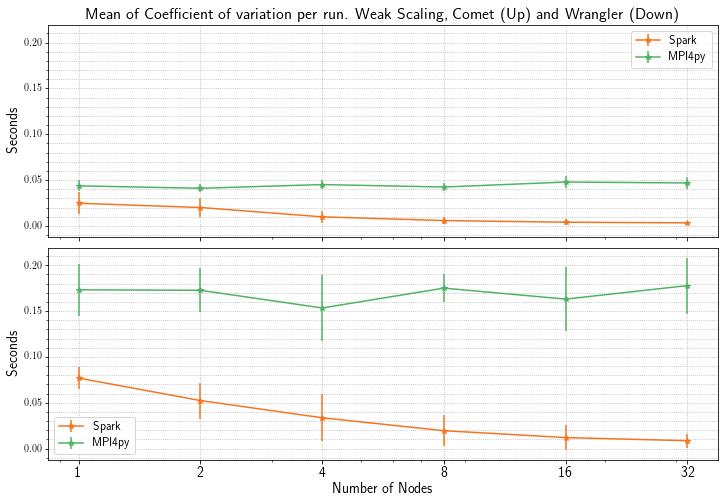

In [6]:
coeffCSpark = task_coeff(SparkComet,nodes=[1,2,4,8,16,32])
coeffWSpark = task_coeff(SparkWrangler,nodes=[1,2,4,8,16,32])
coeffCMPI4py = task_coeff(MPI4pyComet,nodes=[1,2,4,8,16,32])
coeffWMPI4py = task_coeff(MPI4pyWrangler,nodes=[1,2,4,8,16,32])

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCSpark],yerr=[np.std(D) for D in coeffCSpark],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py],yerr=[np.std(D) for D in coeffCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWSpark],yerr=[np.std(D) for D in coeffWSpark],color=oranges(150),marker='*',label='Spark')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWMPI4py],yerr=[np.std(D) for D in coeffWMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Mean of Coefficient of variation per run. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)